# Worldly-Weather
----

In [180]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key_owm

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print('Done')

Done


## Generate Cities List

In [131]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [132]:
'''Note: I wanted to pull historical data to run yearly averages over all of the values, per city to have a 
better representation. I figured out I cannot do this without paying for OWM, so I stuck with current data.
'''

city, cloudiness, country, date, humidity, lat, lng, max_temp, wind_speed = [], [], [], [], [], [], [], [], []

for index, item in enumerate(cities):
    
    try:
        
        url = 'http://api.openweathermap.org/data/2.5/weather?'
        params = {
            'appid' : api_key_owm,
            'q' : item,
            'units' : 'imperial'
        }

        response = requests.get(url, params).json()
        
        
        city.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(time.strftime("%D", time.localtime(int(response['dt']))))
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        print(f'Processing Record {index + 1} of {len(cities)} : {item}')
    
    except:
        print(f'{item} not found. Skipping record.')





print(f'''
------------------
Done
------------------
Query Summary
Sucessful Records: {len(max_temp)}
Failed Records: {len(cities) - len(max_temp)}
''')

Processing Record 1 of 607 : hermanus
Processing Record 2 of 607 : busselton
Processing Record 3 of 607 : khatanga
Processing Record 4 of 607 : charters towers
Processing Record 5 of 607 : bubaque
Processing Record 6 of 607 : katsuura
Processing Record 7 of 607 : hasaki
Processing Record 8 of 607 : new norfolk
Processing Record 9 of 607 : rikitea
taolanaro not found. Skipping record.
Processing Record 11 of 607 : tasiilaq
nizhneyansk not found. Skipping record.
Processing Record 13 of 607 : vila velha
Processing Record 14 of 607 : scarborough
Processing Record 15 of 607 : port moresby
Processing Record 16 of 607 : georgetown
Processing Record 17 of 607 : areosa
Processing Record 18 of 607 : ushuaia
Processing Record 19 of 607 : kavieng
Processing Record 20 of 607 : weare
Processing Record 21 of 607 : albany
grand river south east not found. Skipping record.
Processing Record 23 of 607 : sabha
Processing Record 24 of 607 : east london
Processing Record 25 of 607 : mataura
Processing Rec

Processing Record 209 of 607 : alofi
Processing Record 210 of 607 : la asuncion
Processing Record 211 of 607 : rio grande
Processing Record 212 of 607 : ambilobe
Processing Record 213 of 607 : kihei
Processing Record 214 of 607 : pandan
Processing Record 215 of 607 : mahebourg
Processing Record 216 of 607 : beinamar
Processing Record 217 of 607 : ilulissat
Processing Record 218 of 607 : komsomolskiy
Processing Record 219 of 607 : punta alta
Processing Record 220 of 607 : viesca
Processing Record 221 of 607 : gympie
sentyabrskiy not found. Skipping record.
Processing Record 223 of 607 : bambous virieux
Processing Record 224 of 607 : luwuk
Processing Record 225 of 607 : nemuro
Processing Record 226 of 607 : mao
Processing Record 227 of 607 : troitsko-pechorsk
Processing Record 228 of 607 : itacarambi
Processing Record 229 of 607 : magistralnyy
Processing Record 230 of 607 : cherskiy
Processing Record 231 of 607 : rio gallegos
Processing Record 232 of 607 : conde
Processing Record 233 of 

Processing Record 412 of 607 : sydney mines
Processing Record 413 of 607 : tungor
Processing Record 414 of 607 : puerto leguizamo
Processing Record 415 of 607 : geraldton
Processing Record 416 of 607 : oistins
aflu not found. Skipping record.
Processing Record 418 of 607 : sulangan
Processing Record 419 of 607 : aksarka
Processing Record 420 of 607 : saint-augustin
Processing Record 421 of 607 : galle
Processing Record 422 of 607 : taoudenni
Processing Record 423 of 607 : coracora
Processing Record 424 of 607 : luchenza
tatawin not found. Skipping record.
bacuit not found. Skipping record.
Processing Record 427 of 607 : kirakira
Processing Record 428 of 607 : teknaf
Processing Record 429 of 607 : kruisfontein
Processing Record 430 of 607 : tura
Processing Record 431 of 607 : los llanos de aridane
Processing Record 432 of 607 : lamu
Processing Record 433 of 607 : smithers
meyungs not found. Skipping record.
Processing Record 435 of 607 : nome
Processing Record 436 of 607 : pacific grove

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [190]:
owm_df = pd.DataFrame(list(zip(city, cloudiness, country, date, humidity, lat, lng, max_temp, wind_speed)), 
               columns =['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])

owm_df.to_csv('Output/OWM_raw_data.csv')

owm_df.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [134]:
owm_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,48,ZA,12/18/19,64,-34.42,19.24,64.00,8.99
1,Busselton,100,AU,12/18/19,48,-33.64,115.35,72.00,21.63
2,Khatanga,100,RU,12/18/19,99,71.98,102.47,-10.07,3.33
3,Charters Towers,98,AU,12/18/19,40,-20.07,146.27,86.85,9.95
4,Bubaque,4,GW,12/18/19,63,11.28,-15.83,80.08,8.25


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

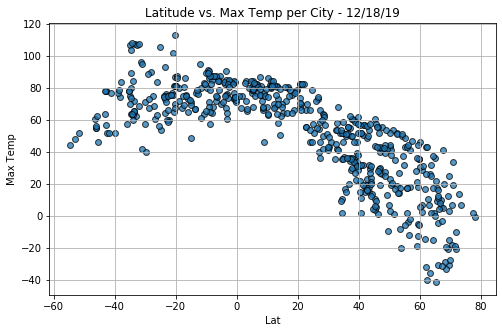

In [206]:
search_date = owm_df['Date'][0]

owm_df.plot(
    kind = 'scatter', 
    x = 'Lat', 
    y = 'Max Temp',
    title = f'Latitude vs. Max Temp per City - {search_date}',
    figsize = (8,5),
    grid = True,
    marker = 'o',
    s = 35,
    edgecolor='black',
    alpha = 0.75,
)

plt.savefig('Output/Latitude vs. Max Temp per City.png')

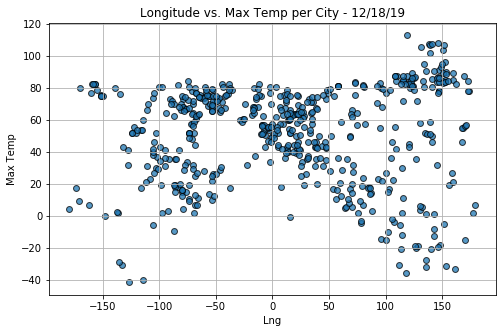

In [216]:
owm_df.plot(
    kind = 'scatter', 
    x = 'Lng', 
    y = 'Max Temp',
    title = f'Longitude vs. Max Temp per City - {search_date}',
    figsize = (8,5),
    grid = True,
    marker = 'o',
    s = 35,
    edgecolor='black',
    alpha = 0.75,
)

plt.savefig('Output/Longitude vs. Max Temp per City.png')

In [217]:
owm_df.sort_values('Max Temp', ascending=False).head(15)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
41,Port Hedland,0,AU,12/18/19,9,-20.31,118.58,113.00,12.75
360,Griffith,22,AU,12/18/19,12,-34.29,146.06,108.00,16.11
93,Jamestown,0,AU,12/18/19,6,-33.21,138.60,107.69,7.40
429,Broken Hill,0,AU,12/18/19,9,-31.97,141.45,107.60,11.41
322,Clarence Town,0,AU,12/18/19,10,-32.59,151.78,107.01,14.99
105,Palmer,0,AU,12/18/19,12,-34.85,139.16,107.01,11.41
94,Yulara,100,AU,12/18/19,9,-25.24,130.99,105.80,10.29
183,Flinders,50,AU,12/18/19,22,-34.58,150.85,104.00,19.46
419,Mount Isa,40,AU,12/18/19,24,-20.73,139.49,102.20,8.05
168,Port Macquarie,90,AU,12/18/19,24,-31.43,152.91,96.01,6.93


#### Latitude vs. Humidity Plot

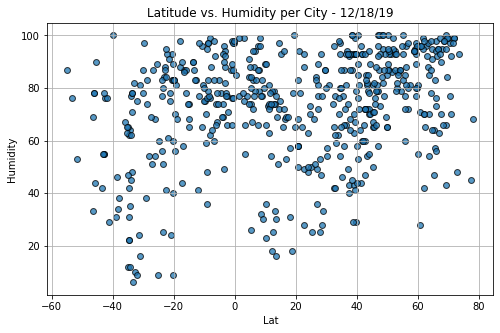

In [209]:
owm_df.plot(
    kind = 'scatter', 
    x = 'Lat', 
    y = 'Humidity',
    title = f'Latitude vs. Humidity per City - {search_date}',
    figsize = (8,5),
    grid = True,
    marker = 'o',
    s = 35,
    edgecolor='black',
    alpha = 0.75,
)

plt.savefig('Output/Latitude vs. Humidity per City.png')

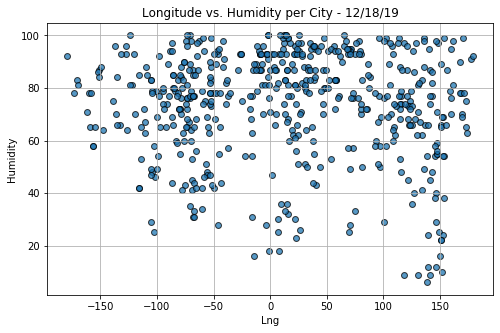

In [211]:
owm_df.plot(
    kind = 'scatter', 
    x = 'Lng', 
    y = 'Humidity',
    title = f'Longitude vs. Humidity per City - {search_date}',
    figsize = (8,5),
    grid = True,
    marker = 'o',
    s = 35,
    edgecolor='black',
    alpha = 0.75,
)

plt.savefig('Output/Longitude vs. Humidity per City.png')

In [220]:
owm_df.sort_values('Humidity', ascending=True).head(15)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
93,Jamestown,0,AU,12/18/19,6,-33.21,138.60,107.69,7.40
41,Port Hedland,0,AU,12/18/19,9,-20.31,118.58,113.00,12.75
94,Yulara,100,AU,12/18/19,9,-25.24,130.99,105.80,10.29
429,Broken Hill,0,AU,12/18/19,9,-31.97,141.45,107.60,11.41
322,Clarence Town,0,AU,12/18/19,10,-32.59,151.78,107.01,14.99
105,Palmer,0,AU,12/18/19,12,-34.85,139.16,107.01,11.41
360,Griffith,22,AU,12/18/19,12,-34.29,146.06,108.00,16.11
231,Bansang,0,GM,12/18/19,16,13.44,-14.66,73.26,6.31
246,Gunnedah,90,AU,12/18/19,16,-30.98,150.25,95.00,8.05
371,Arlit,1,NE,12/18/19,18,18.74,7.39,66.49,8.16


#### Latitude vs. Cloudiness Plot

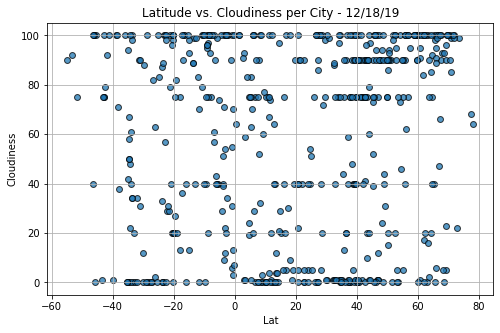

In [213]:
owm_df.plot(
    kind = 'scatter', 
    x = 'Lat', 
    y = 'Cloudiness',
    title = f'Latitude vs. Cloudiness per City - {search_date}',
    figsize = (8,5),
    grid = True,
    marker = 'o',
    s = 35,
    edgecolor='black',
    alpha = 0.75,
)

plt.savefig('Output/Latitude vs. Cloudiness per City.png')

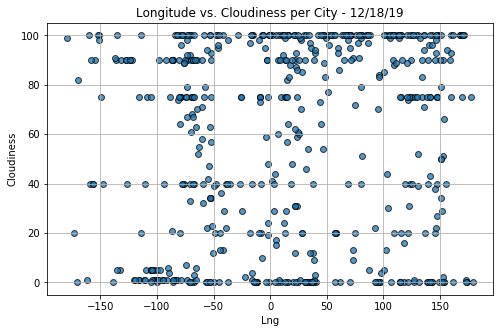

In [215]:
owm_df.plot(
    kind = 'scatter', 
    x = 'Lng', 
    y = 'Cloudiness',
    title = f'Longitude vs. Cloudiness per City - {search_date}',
    figsize = (8,5),
    grid = True,
    marker = 'o',
    s = 35,
    edgecolor='black',
    alpha = 0.75,
)

plt.savefig('Output/Longitude vs. Cloudiness per City.png')

In [223]:
owm_df.sort_values('Cloudiness', ascending=True).head(15)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
549,Kaya,0,NG,12/18/19,33,13.31,12.68,63.75,11.30
369,Giyani,0,ZA,12/18/19,51,-23.32,30.73,71.35,1.79
135,Esperance,0,AU,12/18/19,45,-33.86,121.89,84.20,20.80
134,Murgab,0,TM,12/18/19,92,37.50,61.97,28.40,6.93
373,Ahipara,0,NZ,12/18/19,65,-35.17,173.16,78.01,9.06
376,Tungor,0,RU,12/18/19,82,53.39,142.95,-8.32,19.04
383,Galle,0,GN,12/18/19,89,10.08,-12.83,68.29,1.39
384,Taoudenni,0,ML,12/18/19,28,22.68,-3.98,55.38,6.71
386,Luchenza,0,MW,12/18/19,87,-16.01,35.31,64.80,3.20
122,Lebu,0,ET,12/18/19,83,8.96,38.73,46.15,2.44


#### Latitude vs. Wind Speed Plot

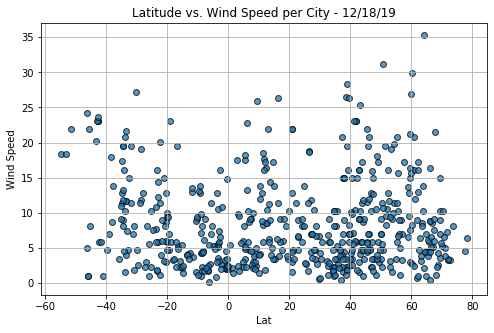

In [224]:
owm_df.plot(
    kind = 'scatter', 
    x = 'Lat', 
    y = 'Wind Speed',
    title = f'Latitude vs. Wind Speed per City - {search_date}',
    figsize = (8,5),
    grid = True,
    marker = 'o',
    s = 35,
    edgecolor='black',
    alpha = 0.75,
)

plt.savefig('Output/Latitude vs. Wind Speed per City.png')

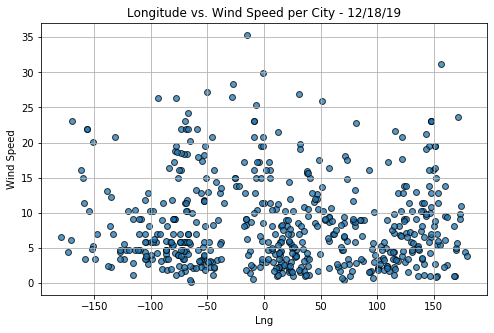

In [225]:
owm_df.plot(
    kind = 'scatter', 
    x = 'Lng', 
    y = 'Wind Speed',
    title = f'Longitude vs. Wind Speed per City - {search_date}',
    figsize = (8,5),
    grid = True,
    marker = 'o',
    s = 35,
    edgecolor='black',
    alpha = 0.75,
)

plt.savefig('Output/Longitude vs. Wind Speed per City.png')

In [227]:
owm_df.sort_values('Wind Speed', ascending=False).head(15)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
407,Hofn,100,IS,12/18/19,87,64.25,-15.21,37.29,35.25
107,Severo-Kurilsk,94,RU,12/18/19,87,50.68,156.12,19.11,31.12
148,Lerwick,100,GB,12/18/19,81,60.15,-1.15,46.40,29.97
76,Praia da Vitoria,40,PT,12/18/19,93,38.73,-27.07,59.00,28.36
54,Cidreira,12,BR,12/18/19,78,-30.17,-50.22,71.08,27.20
127,Nikolskoye,90,RU,12/18/19,80,59.70,30.79,35.60,26.84
74,Ribeira Grande,100,PT,12/18/19,87,38.52,-28.70,60.08,26.51
451,Vardo,40,US,12/18/19,41,39.62,-77.74,28.40,26.40
314,Cristobal Obregon,40,MX,12/18/19,72,16.35,-93.53,64.40,26.40
504,Bandarbeyla,77,SO,12/18/19,80,9.49,50.81,79.11,25.90
